<a href="https://colab.research.google.com/github/Nikhil-Khetani/Tesla-Stock-Price-Predictor/blob/main/Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler


style.use('ggplot')

num_epochs = 100
input_length = 10
batch_size = 16


start = datetime(2011, 1, 1)
end = datetime(2021, 1, 1)

df = web.DataReader('TSLA', 'yahoo', start, end).reset_index(level=0)
'''
df.to_csv('tsla.csv')

df = pd.read_csv('tsla.csv', index_col=0).reset_index()
'''
df.head()


In [ ]:
df = pd.DataFrame(df[['Date','Adj Close']])
df['Date']=pd.to_datetime(df['Date'])
df.head()

In [ ]:
df.info()

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df['2015'].head()

In [ ]:
date_range = df.index.max()-df.index.min()
print(date_range)

In [ ]:
new_index = pd.date_range(df.index.min(),df.index.max())
df = df.reindex(new_index)

In [ ]:
df['Adj Close'].value_counts(dropna=False)

In [ ]:
df['Adj Close'].interpolate(method='linear', inplace=True)

In [ ]:
df['Adj Close'].value_counts(dropna=False)


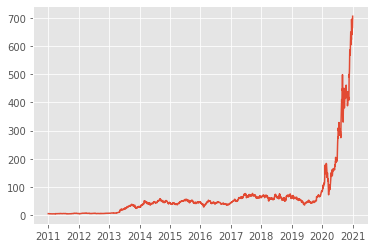

In [12]:
plt.plot(df)

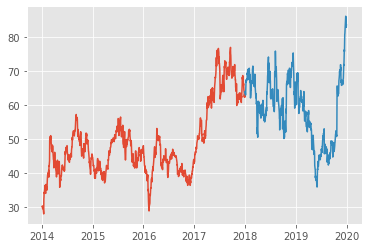

In [13]:
train_data = pd.DataFrame(df['2014':'2017'])
test_data = df['2018':'2019']

plt.plot(train_data)
plt.plot(test_data)

In [14]:
scaler = MinMaxScaler(feature_range=(-1,1))
train_data_scaled = scaler.fit_transform(train_data)

In [15]:
train_data['Scaled_close'] = train_data_scaled
train_data_scaled = pd.DataFrame(train_data['Scaled_close'])
train_data_scaled

,Scaled_close
2014-01-01,-0.911056
2014-01-02,-0.912399
2014-01-03,-0.916796
2014-01-04,-0.923743
2014-01-05,-0.930690
...,...
2017-12-27,0.402752
2017-12-28,0.433037
2017-12-29,0.400391
2017-12-30,0.419075


In [16]:
test_data_scaled = scaler.transform(test_data)
test_data['Scaled_close'] = test_data_scaled
test_data_scaled = pd.DataFrame(test_data['Scaled_close'])
test_data_scaled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Scaled_close
2018-01-01,0.456444
2018-01-02,0.475128
2018-01-03,0.448425
2018-01-04,0.427013
2018-01-05,0.442970
...,...
2019-12-27,1.369454
2019-12-28,1.326902
2019-12-29,1.284350
2019-12-30,1.241798


In [17]:
def ConvertToKerasLagged(scaled_data, input_length, n_features):
  train_data_lagged= scaled_data
  for lag in range(1, input_length + 1):
              train_data_lagged['lag_' + str(lag)] = train_data_lagged[train_data_lagged.columns[0]].shift(lag)
              train_data_lagged.dropna(inplace=True)
  lag_features  = [i for i in reversed(train_data_lagged.columns) if i!='Scaled_close']
  X_data = np.array(train_data_lagged[lag_features])
  y_data = np.array(train_data_lagged['Scaled_close'])
  # reshape from [samples, timesteps] into [samples, timesteps, features]
  X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], n_features))
  return X_data, y_data



In [18]:
n_features = 1
X_data, y_data = ConvertToKerasLagged(train_data_scaled, input_length, n_features)
X_data.shape

(1406, 10, 1)

In [19]:
# for i in range(len(X_data)):
  # print(X_data[i],y_data[i])


In [20]:
import tensorflow as tf

In [21]:



model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(input_length, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [22]:

n_features = 1


In [23]:
model.fit(X_data, y_data, epochs=3000, shuffle=True,verbose=1)


Epoch 1/3000
44/44 [==============================] - 2s 5ms/step - loss: 0.1024
Epoch 2/3000
44/44 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 3/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 4/3000
44/44 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 5/3000
44/44 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 6/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 7/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 8/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 9/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 10/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 11/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 12/3000
44/44 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 13/3000
44/44 [====

KeyboardInterrupt: ignored

In [24]:
for i in range(20):
  print(model(np.expand_dims(X_data[i],0)).numpy(),y_data[i])

[[-0.35422146]] -0.1153627592159081
[[-0.18335047]] -0.07465609143844576
[[-0.08767217]] -0.07840106636363631
[[-0.0605482]] -0.14133347785061723
[[-0.09847669]] -0.1257292862593129
[[-0.10908045]] -0.11012509466800857
[[-0.10614704]] -0.09452090307670424
[[-0.09718832]] -0.059676036454070935
[[-0.07324146]] -0.07742402186269093
[[-0.07466178]] -0.07514445840530426
[[-0.07503727]] -0.12993566056368433
[[-0.10721038]] -0.14993619008080894
[[-0.1342879]] -0.16993671959793377
[[-0.15815526]] -0.18993724911505838
[[-0.18034796]] -0.2260034213638733
[[-0.21077213]] -0.16836276488376
[[-0.18930294]] -0.19848576736387225
[[-0.19547471]] -0.25400959761434705
[[-0.23082632]] -0.24584111013084042
[[-0.24183087]] -0.23767262264733358


In [25]:
# test_dates = pd.date_range(start=datetime(year=2015,month=1,day=2),periods=20)
# for i in test_dates:
  # print(i)

In [26]:
test_df = train_data['Scaled_close']['2015-01-01':'2015-01-10']
test_df

2015-01-01   -0.336319
2015-01-02   -0.348938
2015-01-03   -0.373959
2015-01-04   -0.398980
2015-01-05   -0.424001
2015-01-06   -0.414312
2015-01-07   -0.416999
2015-01-08   -0.419686
2015-01-09   -0.451925
2015-01-10   -0.464002
Freq: D, Name: Scaled_close, dtype: float64

In [27]:
test_input = np.array(test_df)
test_input

array([-0.33631853, -0.34893758, -0.37395858, -0.39897958, -0.42400059,
       -0.41431244, -0.41699916, -0.41968572, -0.4519254 , -0.4640017 ])

In [28]:
test_start_date = test_df.index.min()
test_start_date

Timestamp('2015-01-01 00:00:00', freq='D')

In [29]:
def predict(model, input_array, future_steps):
  seq_length = len(input_array)
  prediction = input_array
  for i in range(future_steps):
    input_seq = prediction[-seq_length:]
    model_output = model(np.expand_dims(np.expand_dims(input_seq,1),0)).numpy()[0]
    prediction = np.append(prediction, model_output)
  return prediction


In [30]:
pred = scaler.inverse_transform(np.expand_dims(predict(model, test_input, 100),0))[0]
pred_date_range = pd.date_range(test_start_date,periods=len(pred))
pred_df = pd.DataFrame(data={'Predictions':pred}, index=pred_date_range)
pred_df

,Predictions
2015-01-01,44.171999
2015-01-02,43.862000
2015-01-03,43.247334
2015-01-04,42.632668
2015-01-05,42.018002
...,...
2015-04-16,48.281906
2015-04-17,48.297102
2015-04-18,48.311974
2015-04-19,48.326531


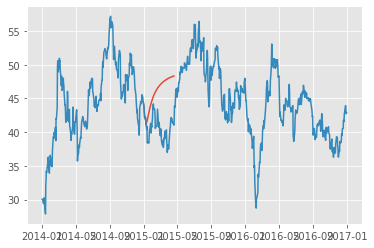

In [31]:
plt.plot(pred_df)
plt.plot(df['2014':'2016'])

# Simple LSTM

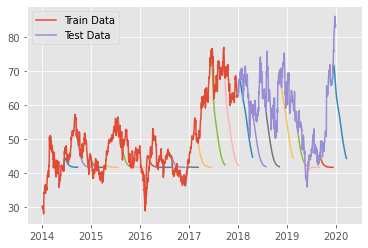

In [33]:
def predictEveryNPeriods(model, data, N, input_length, future_steps, scaler):
  timestep = data.index.min()
  while timestep<data.index.max() - timedelta(days=input_length):
    input_seq = data[timestep:timestep+timedelta(days=input_length)]
    pred = scaler.inverse_transform(np.expand_dims(predict(model, input_seq, future_steps=future_steps),0))[0]
    pred_date_range = pd.date_range(timestep,periods=len(pred))
    pred_df = pd.DataFrame(data={'Predictions':pred}, index=pred_date_range)
    plt.plot(pred_df)

    timestep += timedelta(days=N)
  pass


predictEveryNPeriods(model, train_data_scaled['Scaled_close'],100,input_length,100, scaler)

plt.plot(train_data['Adj Close'],label = 'Train Data')

predictEveryNPeriods(model, test_data_scaled['Scaled_close'],100,input_length,100, scaler)
plt.plot(test_data['Adj Close'],label = 'Test Data')
plt.legend()

# Bidirectional LSTM

In [35]:
# Birectional
input_length  

model_bidirectional = tf.keras.models.Sequential()
model_bidirectional.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(input_length, n_features)))
model_bidirectional.add(tf.keras.layers.Dense(1))
model_bidirectional.compile(optimizer='adam', loss='mse')

In [36]:
X_data, y_data = ConvertToKerasLagged(train_data_scaled, input_length, n_features )

In [37]:
model_bidirectional.fit(X_data, y_data, epochs=3000, shuffle=True,verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 502/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 503/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 504/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 505/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 506/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 507/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 508/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 509/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 510/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 511/3000
43/43 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 512/3000
43/43 [==============

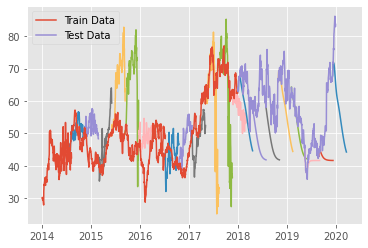

In [38]:
predictEveryNPeriods(model_bidirectional, train_data_scaled['Scaled_close'],100,input_length,100, scaler)

plt.plot(train_data['Adj Close'],label = 'Train Data')

predictEveryNPeriods(model, test_data_scaled['Scaled_close'],100,input_length,100, scaler)
plt.plot(test_data['Adj Close'],label = 'Test Data')
plt.legend()